# Proyek Analisis Data: Bikes Sharing Dataset
- **Nama:** La Ode Muhammad Yudhy Prayitno
- **Email:** yudhyprayitno567@gmail.com
- **ID Dicoding:** yudhy_pr

## 📊📈🚲 USA Bikes Sharing Data

<i>Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012.<i>
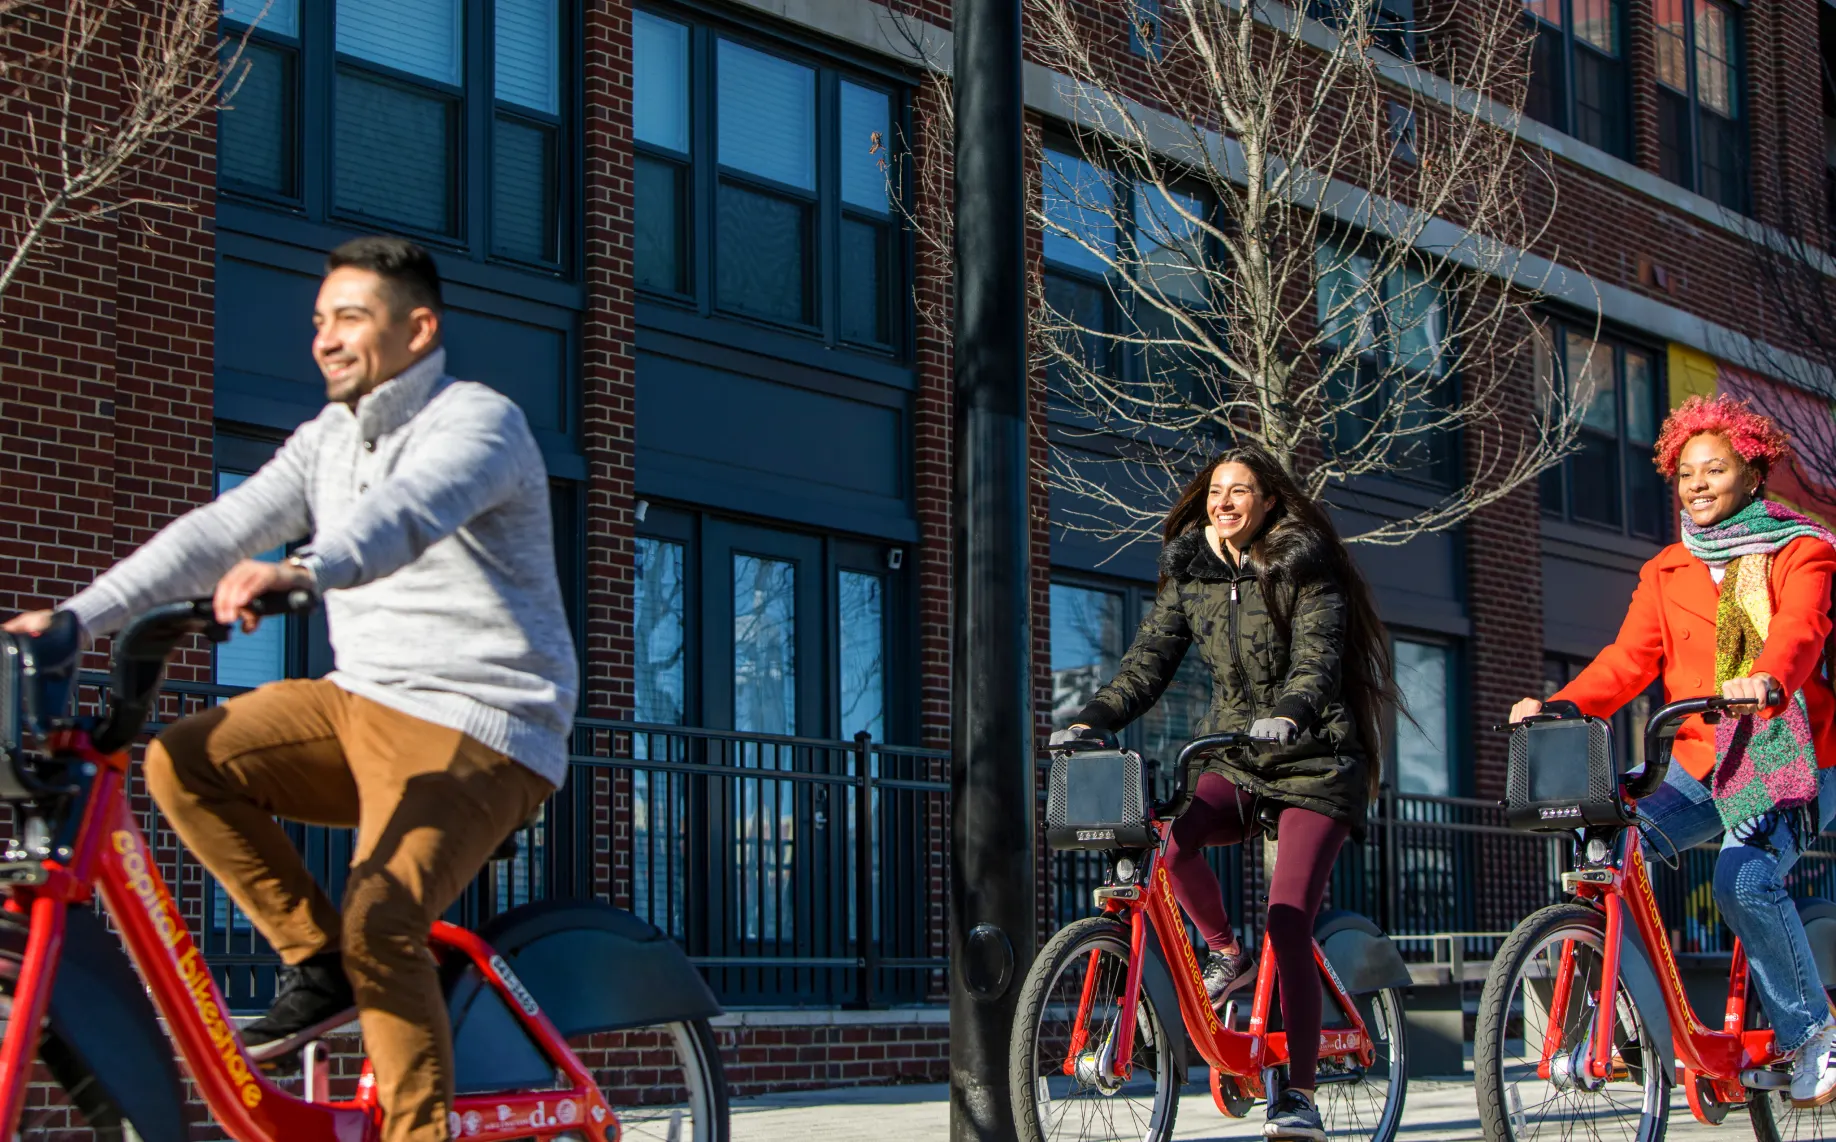
[source] <a href="https://capitalbikeshare.com/">capital bikeshare</a>

## Defining the Business Question
- Bagaimana pola penggunaan sepeda oleh pengguna casual dan registered berdasarkan weekdays, month,hour, holiday & working day?
- Apakah ada perbedaan frekuensi peminjaman sepeda berdasarkan cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
# import necessary libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

## Gathering Data


In [2]:
# read in the csv file as a pandas dataframe
bikes_day = pd.read_csv("data\day.csv")
bikes_hour = pd.read_csv("data\hour.csv")

In [3]:
bikes_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Explore the data
### Features:
- **"instant"** - record index
- **"dteday"** - date
- **"season"** - season (1:springer, 2:summer, 3:fall, 4:winter)
- **"yr"** - year (0: 2011, 1:2012)
- **"mnth"** - : month ( 1 to 12)
- **"hr"** - : hour (0 to 23)
- **"holiday"** - : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **"weekday"** - : day of the week
- **"workingday"** - : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **"weathersit"** - : 
    - **1**: Clear, Few clouds, Partly cloudy, Partly cloudy
    - **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **"temp"** - : Normalized temperature in Celsius. The values are divided to 41 (max)
- **"atemp"** -: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- **"hum"** -: Normalized humidity. The values are divided to 100 (max)
- **"windspeed"** -: Normalized wind speed. The values are divided to 67 (max)
- **"casual"** -: count of casual users
- **"registered"** -: count of registered users
- **"cnt"** -: count of total rental bikes including both casual and registered

In [4]:
bikes_day.shape

(731, 16)

In [5]:
bikes_hour.shape

(17379, 17)

<b>Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv</b>

In [6]:
bikes_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [7]:
bikes_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [8]:
# count the unique values in the weather_code column
bikes_day.weathersit.value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [9]:
# count the unique values in the weather_code column
bikes_hour.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

<b>as we see that in bikes_day it has no weather `- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog` while in bikes_hour there are 3</b>

In [10]:
# count the unique values in the season column
bikes_day.season.value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

## Cleaning Data

### Null values check

In [11]:
# check for missing values
bikes_day.isnull().sum().sum()

0

In [12]:
bikes_hour.isnull().sum().sum()

0

<b>From the code above, it can be concluded that the bikes_day and bikes_hour datasets are both clean of null values.</b>

### Check for duplicated values

In [13]:
bikes_day.duplicated().sum()

0

In [14]:
bikes_hour.duplicated().sum()

0

<b>From the code above, it can be concluded that the bikes_day and bikes_hour datasets are no duplicated values.</b>

## Data Transformation

### Changing column names

In [15]:
# specifying the column names that I want to use
new_column_names = {
    'instant': 'record_index',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'weekday',
    'workingday': 'working_day',
    'weathersit': 'weather',
    'temp': 'temperature',
    'atemp': 'feels_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual',
    'registered': 'registered',
    'cnt': 'count'
}

# Renaming the columns to the specified column names
bikes_day.rename(columns=new_column_names, inplace=True)
bikes_hour.rename(columns=new_column_names, inplace=True)

In [16]:
# creating a season dictionary so that we can map the integers 1-4 to the actual written values
season_dict = {
    '1':'springer',
    '2':'summer',
    '3':'fall',
    '4':'winter'
}
# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1':'Clear',
    '2':'Cloudy',
    '3':'Light rain/snow',
    '4':'Heavy rain/snow',
}

# creating a weekday dictionary so that we can map the integers to the actual written values
weekday_dict ={
    '0':'Sunday',
    '1':'Monday',
    '2':'Tuesday',
    '3':'Wednesday',
    '4':'Thursday',
    '5':'Friday',
    '6':'Saturday',
}

# creating a monthly dictionary so that we can map the integers to the actual written values
monthly_dict ={
    '1':'Jan',
    '2':'Feb',
    '3':'Mar',
    '4':'Apr',
    '5':'May',
    '6':'Jun',
    '7':'Jul',
    '8':'Aug',
    '9':'Sep',
    '10':'Oct',
    '11':'Nov',
    '12':'Dec',
}


# changing the seasons column data type to string
bikes_day.season = bikes_day.season.astype('str')
bikes_hour.season = bikes_day.season.astype('str')
# mapping the values 1-4 to the actual written seasons
bikes_day.season = bikes_day.season.map(season_dict)
bikes_hour.season = bikes_hour.season.map(season_dict)

# changing the weather column data type to string
bikes_day.weather = bikes_day.weather.astype('str')
bikes_hour.weather = bikes_hour.weather.astype('str')
# mapping the values to the actual written weathers
bikes_day.weather = bikes_day.weather.map(weather_dict)
bikes_hour.weather = bikes_hour.weather.map(weather_dict)

# changing the weekday column data type to string
bikes_day.weekday = bikes_day.weekday.astype('str')
bikes_hour.weekday = bikes_hour.weekday.astype('str')
# mapping the values to the actual written weekdays
bikes_day.weekday = bikes_day.weekday.map(weekday_dict)
bikes_hour.weekday = bikes_hour.weekday.map(weekday_dict)

# changing the month column data type to string
bikes_day.month = bikes_day.month.astype('str')
bikes_hour.month = bikes_hour.month.astype('str')
# mapping the values to the actual written month
bikes_day.month = bikes_day.month.map(monthly_dict)
bikes_hour.month = bikes_hour.month.map(monthly_dict)

### Changing datatypes

In [17]:
# Convert timestamp to pandas datetime data type
bikes_day['date'] = pd.to_datetime(bikes_day['date'])
bikes_hour['date'] = pd.to_datetime(bikes_hour['date'])

In [18]:
# checking our dataframe to see if the mappings have worked
bikes_hour.head()

record_index       date    season  year month  hour  holiday   weekday  \
0             1 2011-01-01  springer     0   Jan     0        0  Saturday   
1             2 2011-01-01  springer     0   Jan     1        0  Saturday   
2             3 2011-01-01  springer     0   Jan     2        0  Saturday   
3             4 2011-01-01  springer     0   Jan     3        0  Saturday   
4             5 2011-01-01  springer     0   Jan     4        0  Saturday   

   working_day weather  temperature  feels_temperature  humidity  wind_speed  \
0            0   Clear         0.24             0.2879      0.81         0.0   
1            0   Clear         0.22             0.2727      0.80         0.0   
2            0   Clear         0.22             0.2727      0.80         0.0   
3            0   Clear         0.24             0.2879      0.75         0.0   
4            0   Clear         0.24             0.2879      0.75         0.0   

   casual  registered  count  
0       3          13     16  
1       8          32     40  
2       5          27     32  
3       3          10     13  
4       0           1      1

### Dropping column

In [19]:
# Dropping the 'record_index' column from both datasets
bikes_day = bikes_day.drop('record_index', axis=1)
bikes_hour = bikes_hour.drop('record_index', axis=1)

<b>Because the record_index column is not needed, it is dropped.</b>

### Checking ouliers in Target varibale "count"

In [20]:
Q1 = bikes_hour['count'].quantile(0.25)
Q3 = bikes_hour['count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = bikes_hour[(bikes_hour['count'] < lower_bound) | (bikes_hour['count'] > upper_bound)]
outliers.value_counts().sum()

0

<b>No outliers were found in the target variable "count" in the bikes_hour dataset.</b>

## Exploratory Data Analysis (EDA)

### Correlation matrix and Heatmap

In [21]:
bikes_hour.describe()

date          year          hour  \
count                          17379  17379.000000  17379.000000   
mean   2012-01-02 04:08:34.552045568      0.502561     11.546752   
min              2011-01-01 00:00:00      0.000000      0.000000   
25%              2011-07-04 00:00:00      0.000000      6.000000   
50%              2012-01-02 00:00:00      1.000000     12.000000   
75%              2012-07-02 00:00:00      1.000000     18.000000   
max              2012-12-31 00:00:00      1.000000     23.000000   
std                              NaN      0.500008      6.914405   

            holiday   working_day   temperature  feels_temperature  \
count  17379.000000  17379.000000  17379.000000       17379.000000   
mean       0.028770      0.682721      0.496987           0.475775   
min        0.000000      0.000000      0.020000           0.000000   
25%        0.000000      0.000000      0.340000           0.333300   
50%        0.000000      1.000000      0.500000           0.484800   
75%        0.000000      1.000000      0.660000           0.621200   
max        1.000000      1.000000      1.000000           1.000000   
std        0.167165      0.465431      0.192556           0.171850   

           humidity    wind_speed        casual    registered         count  
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.627229      0.190098     35.676218    153.786869    189.463088  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.480000      0.104500      4.000000     34.000000     40.000000  
50%        0.630000      0.194000     17.000000    115.000000    142.000000  
75%        0.780000      0.253700     48.000000    220.000000    281.000000  
max        1.000000      0.850700    367.000000    886.000000    977.000000  
std        0.192930      0.122340     49.305030    151.357286    181.387599

In [22]:
bikes_corr = bikes_hour.corr(numeric_only=True)
bikes_corr

year      hour   holiday  working_day  temperature  \
year               1.000000 -0.003867  0.006692    -0.002196     0.040913   
hour              -0.003867  1.000000  0.000479     0.002285     0.137603   
holiday            0.006692  0.000479  1.000000    -0.252471    -0.027340   
working_day       -0.002196  0.002285 -0.252471     1.000000     0.055390   
temperature        0.040913  0.137603 -0.027340     0.055390     1.000000   
feels_temperature  0.039222  0.133750 -0.030973     0.054667     0.987672   
humidity          -0.083546 -0.276498 -0.010588     0.015688    -0.069881   
wind_speed        -0.008740  0.137252  0.003988    -0.011830    -0.023125   
casual             0.142779  0.301202  0.031564    -0.300942     0.459616   
registered         0.253684  0.374141 -0.047345     0.134326     0.335361   
count              0.250495  0.394071 -0.030927     0.030284     0.404772   

                   feels_temperature  humidity  wind_speed    casual  \
year                        0.039222 -0.083546   -0.008740  0.142779   
hour                        0.133750 -0.276498    0.137252  0.301202   
holiday                    -0.030973 -0.010588    0.003988  0.031564   
working_day                 0.054667  0.015688   -0.011830 -0.300942   
temperature                 0.987672 -0.069881   -0.023125  0.459616   
feels_temperature           1.000000 -0.051918   -0.062336  0.454080   
humidity                   -0.051918  1.000000   -0.290105 -0.347028   
wind_speed                 -0.062336 -0.290105    1.000000  0.090287   
casual                      0.454080 -0.347028    0.090287  1.000000   
registered                  0.332559 -0.273933    0.082321  0.506618   
count                       0.400929 -0.322911    0.093234  0.694564   

                   registered     count  
year                 0.253684  0.250495  
hour                 0.374141  0.394071  
holiday             -0.047345 -0.030927  
working_day          0.134326  0.030284  
temperature          0.335361  0.404772  
feels_temperature    0.332559  0.400929  
humidity            -0.273933 -0.322911  
wind_speed           0.082321  0.093234  
casual               0.506618  0.694564  
registered           1.000000  0.972151  
count                0.972151  1.000000

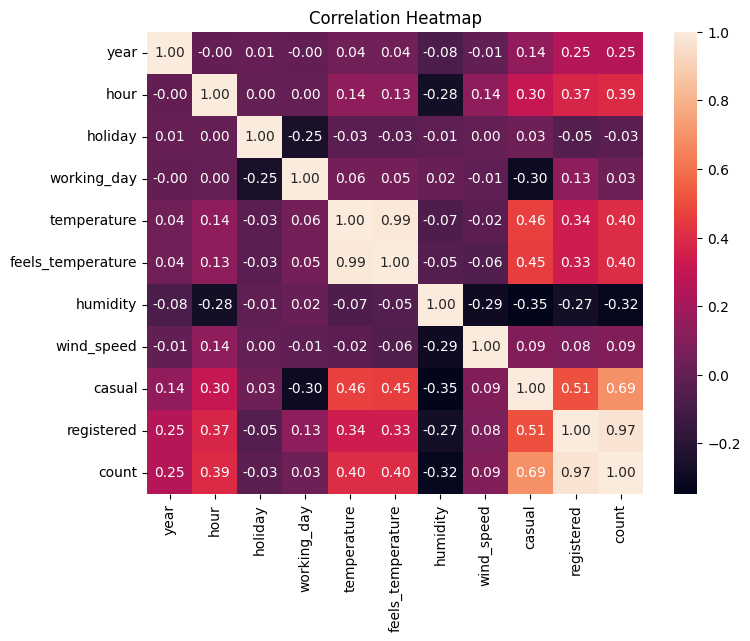

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(bikes_corr, annot=True, fmt='.2f')  # Set fmt='.2f' for 2 decimal places
ax.set(title="Correlation Heatmap")
plt.show()

<b>There is a strong correlation between the number of casual and registered users and temperature, humidity, and wind speed. In addition, there is a significant correlation between the number of users and the time of day (hour) and working_day.</b>

### Count of Trips by Hour (Time) of the Day

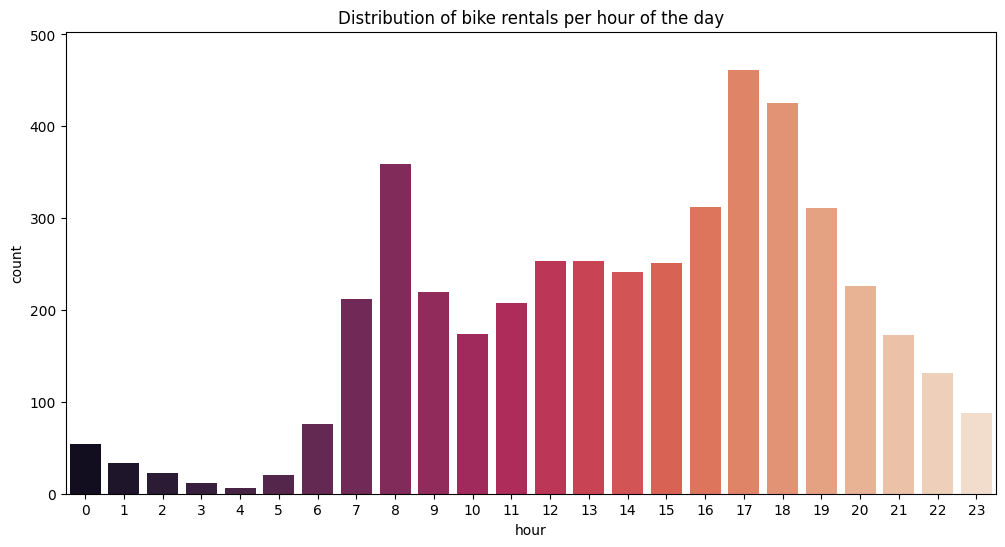

In [24]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='hour', y='count', data=bikes_hour,palette='rocket')
plt.title('Distribution of bike rentals per hour of the day')
# Removing potential annotations or extra lines
for artist in ax.lines + ax.collections:
    artist.remove()
plt.show()

<b>As we can see above, bike share demand is highest around rush hour 7 to 8 am and 4 to 7pm.</b>

### Count of Trips by Mount, Season, and Weather

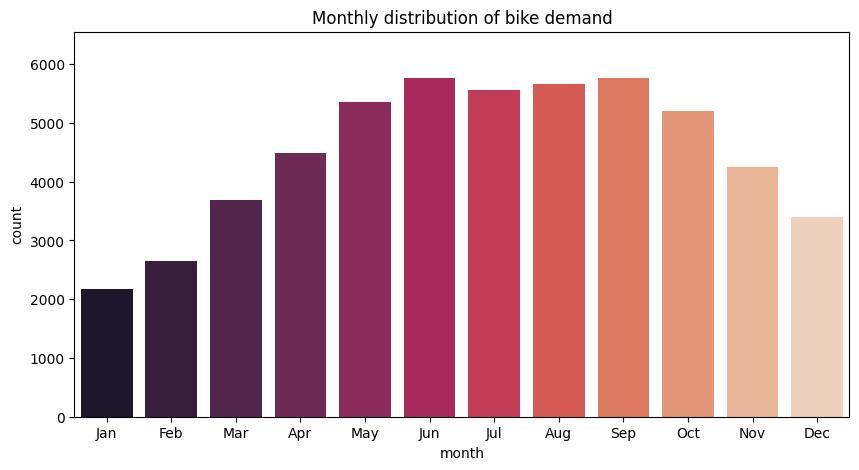

In [25]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=bikes_day, x="month",y="count",linewidth=0,  palette='rocket')
ax.set(title="Monthly distribution of bike demand")

# Removing potential annotations or extra lines
for artist in ax.lines + ax.collections:
    artist.remove()

plt.show()

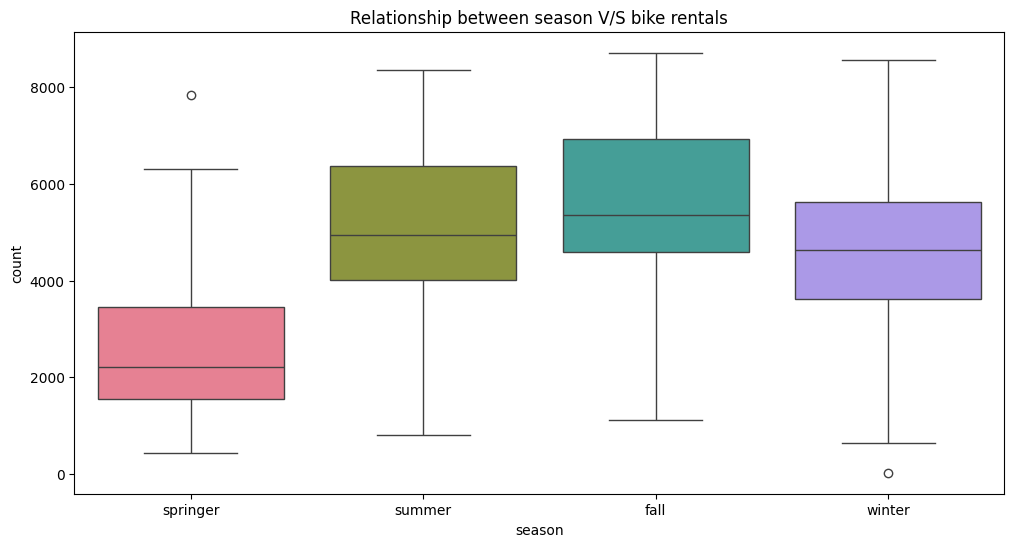

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='count', data=bikes_day, palette="husl")
plt.title('Relationship between season V/S bike rentals')
plt.show()

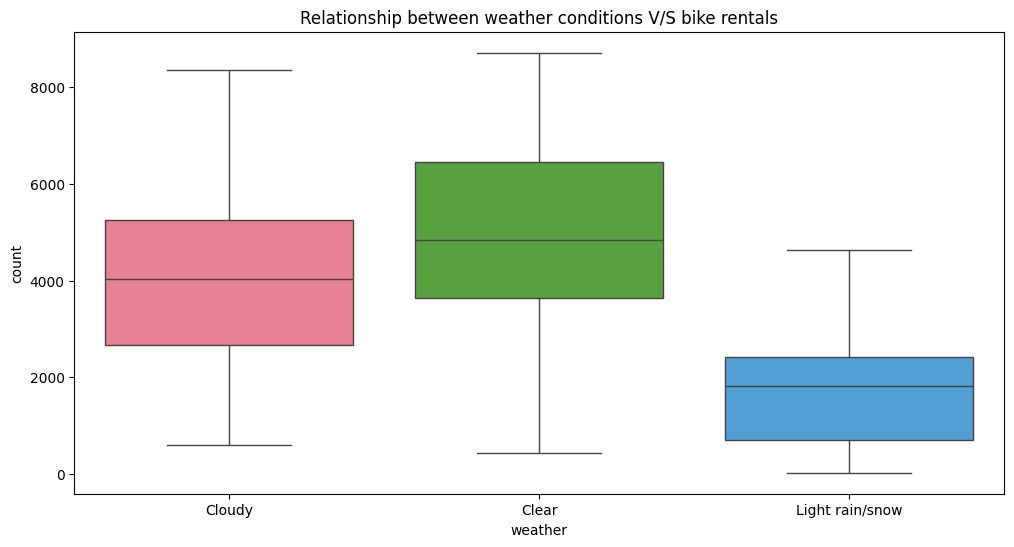

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weather', y='count', data=bikes_day, palette="husl")
plt.title('Relationship between weather conditions V/S bike rentals')
plt.show()

<b>Bike demand peaks during summer and fall, with the highest demand from June to September. Clear weather significantly boosts bike rentals, while light rain or snow substantially decreases demand.</b>

### Rider Type Distribution 

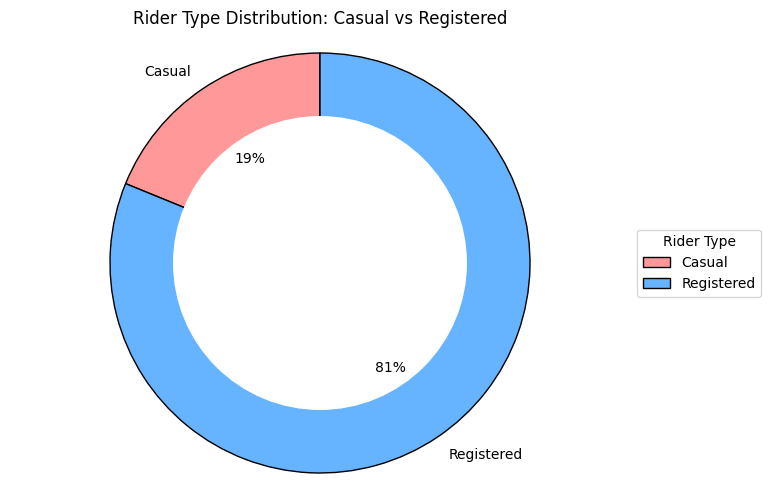

In [28]:
# Total rentals for casual and registered users
total_casual = bikes_day['casual'].sum()
total_registered = bikes_day['registered'].sum()

# Data for the pie chart
totals = [total_casual, total_registered]
labels = ['Casual', 'Registered']
colors = ['#ff9999', '#66b3ff']

# Calculate percentages
percentages = [round((total_casual / (total_casual + total_registered)) * 100, 2),
               round((total_registered / (total_casual + total_registered)) * 100, 2)]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Rider Type Distribution: Casual vs Registered')
plt.legend(labels, title="Rider Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


<b>Casual riders count for 19% of total rides, while registered contribute to around 81% of total rides.</b>
<br>
This could suggest that members have a higher level of satisfaction or dependency on the service compared to casual riders. 

### Relation Temperature, Hummudity, Wind Speed with Number of Bycle

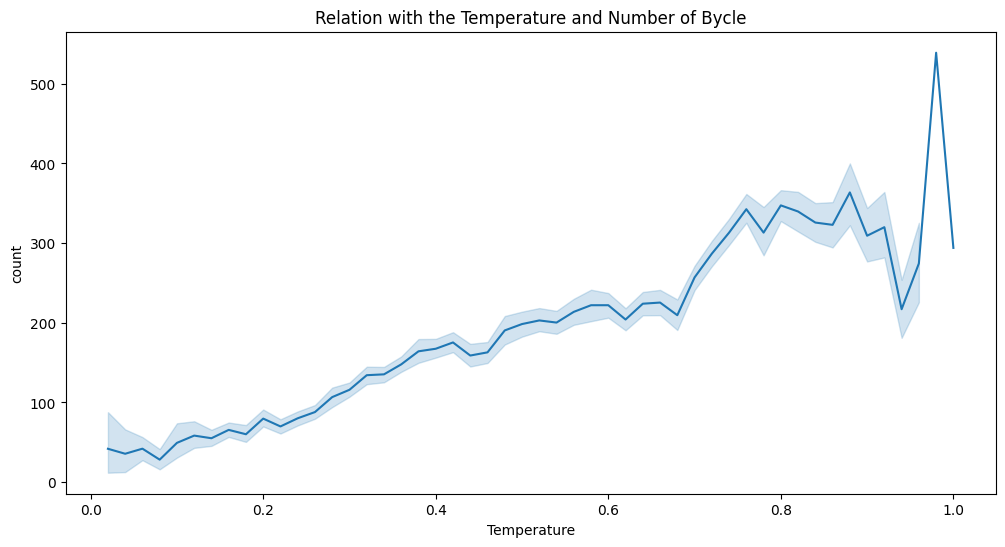

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour, x="temperature", y="count")
plt.title("Relation with the Temperature and Number of Bycle")
plt.xlabel("Temperature")

plt.show()

<b>It looks like there is some correlation between the temperature of the day and the bikes rented.</b>
<br>
<i>The values are divided to 41 (max) celcius</i>
- Rental counts escalate with rising temperatures.

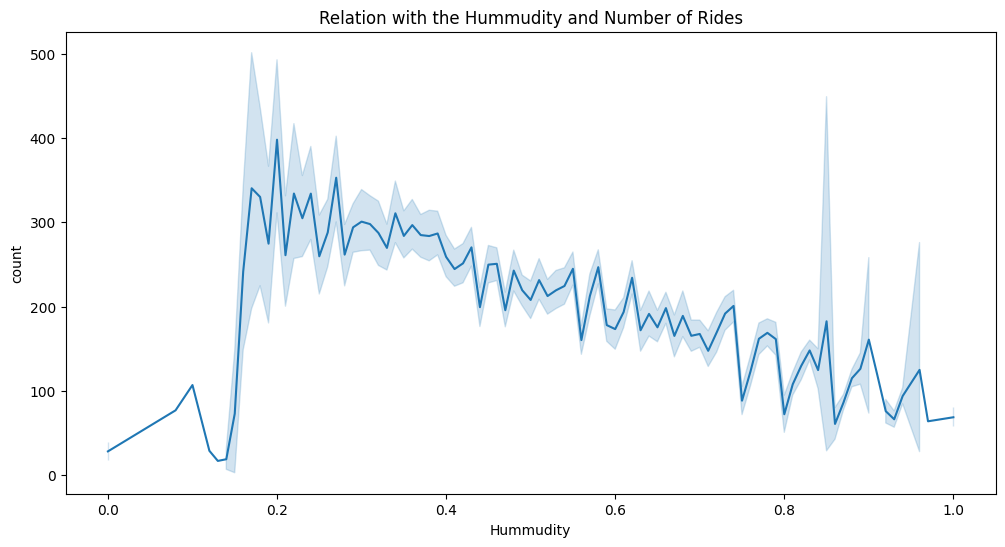

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour, x="humidity", y="count")
plt.title("Relation with the Hummudity and Number of Rides")
plt.xlabel("Hummudity")

plt.show()

<i>The values are divided to 100 (max)</i>
<br>
<b>There's an inverse relationship between rental count and humidity.</b>

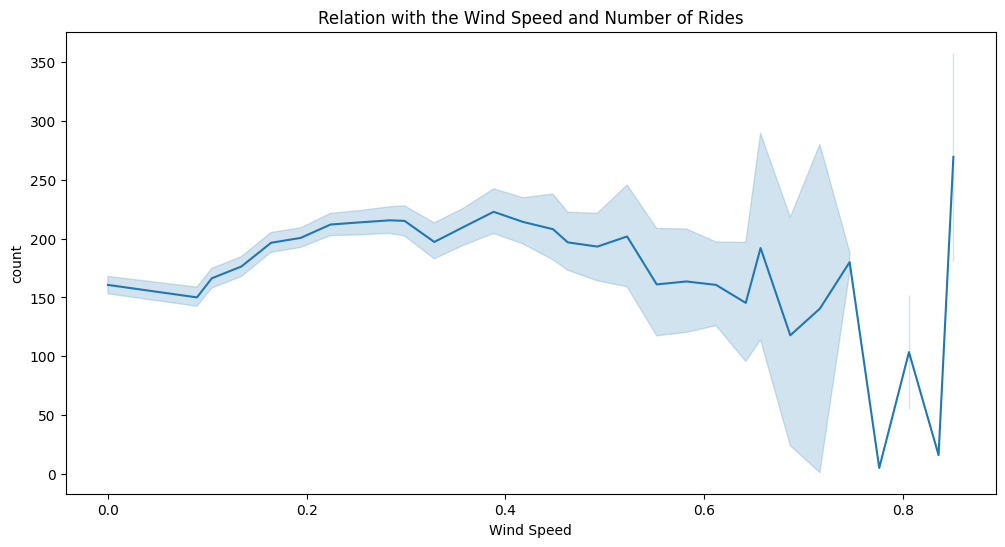

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour, x="wind_speed", y="count")
plt.title("Relation with the Wind Speed and Number of Rides")
plt.xlabel("Wind Speed")

plt.show()

<i>The values are divided to 67 (max)</i>
<br>
<b>There appears to be a general downward trend in rentals as wind speed increases, with some fluctuations and high variability at higher wind speeds.</b>

## Visualization & Explanatory Analysis:

### Number of Trips by Members and Casual Riders by Weekday

<Figure size 1000x600 with 0 Axes>

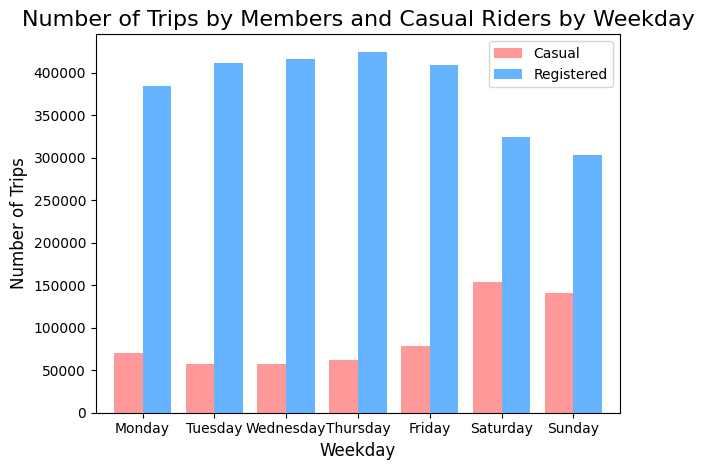

In [32]:
# Define the correct weekday order (from Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by weekday and sum the 'casual' and 'registered' trips
# Ensure the 'weekday' column is categorical and follows the correct order
bikes_day['weekday'] = pd.Categorical(bikes_day['weekday'], categories=weekday_order, ordered=True)

# Now group by weekday
grouped_data = bikes_day.groupby('weekday')[['casual', 'registered']].sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=False, color=['#ff9999','#66b3ff'], width=0.8)
plt.title('Number of Trips by Members and Casual Riders by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Casual', 'Registered'])

plt.tight_layout()
plt.show()

<b>Description:</b>
<br>
- Bar chart showing number of trip duration in each day of the week for each user types.

<b>Insight:</b>
- For the registered/members number of trips is quite stable from Monday to Friday, but has decreased from Saturday to Sunday.
Conversely, for casuals, it is stable from Monday to Friday and increases on Saturday and Sunday.

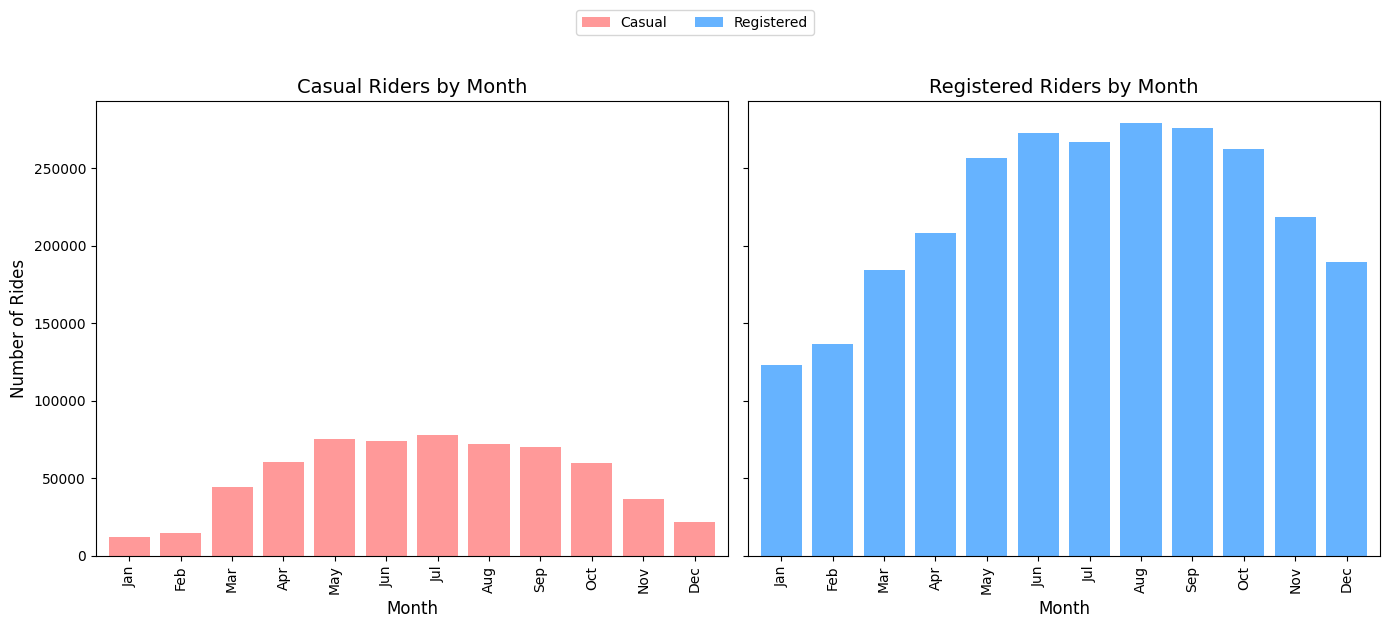

In [33]:
# Determining the order of the months 
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bikes_day['month'] = pd.Categorical(bikes_day['month'], categories=month_order, ordered=True)

# Grouping data by month and summing up the 'casual' and 'registered' columns
grouped_month = bikes_day.groupby('month')[['casual', 'registered']].sum()
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot casual
grouped_month['casual'].plot(kind='bar', ax=ax[0], color='#ff9999', width=0.8)
ax[0].set_title('Casual Riders by Month', fontsize=14)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Number of Rides', fontsize=12)

# Plot registered 
grouped_month['registered'].plot(kind='bar', ax=ax[1], color='#66b3ff', width=0.8)
ax[1].set_title('Registered Riders by Month', fontsize=14)
ax[1].set_xlabel('Month', fontsize=12)

ax[0].legend().remove()
ax[1].legend().remove()
fig.legend(['Casual', 'Registered'], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<b>There is an overall increasing trend in the number of bike loans from January to July for casual users while it is registered until August, but after that it is equally decreasing.</b>

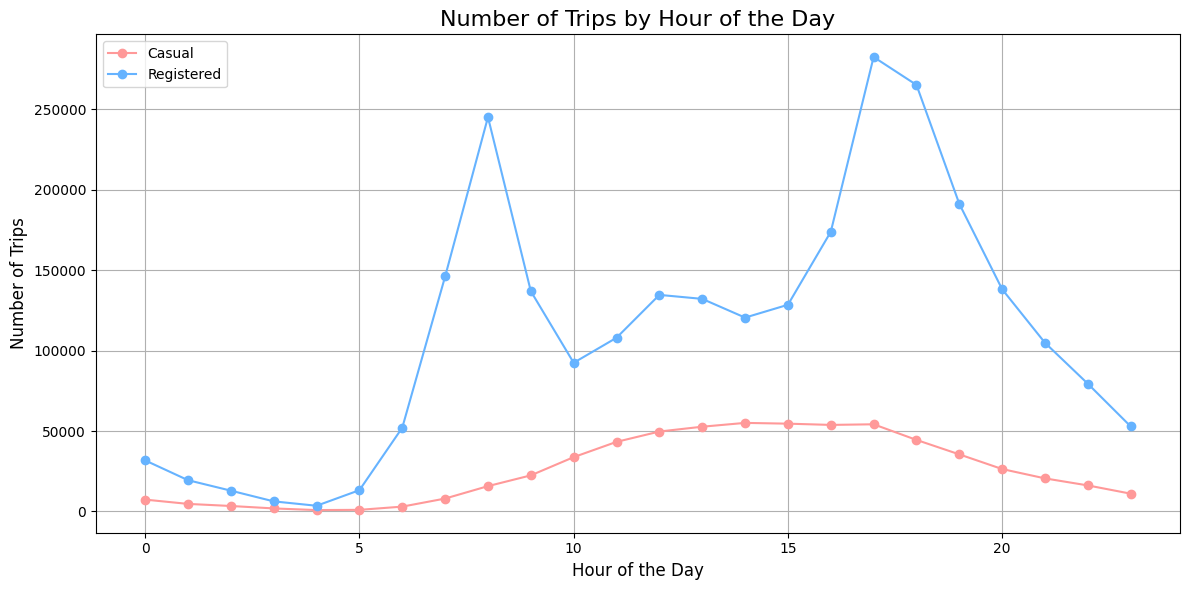

In [34]:
# Grouping data by hour and summing up the 'casual' and 'registered' columns
grouped_hour = bikes_hour.groupby('hour')[['casual', 'registered']].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped_hour.index, grouped_hour['casual'], label='Casual', color='#ff9999', marker='o')
plt.plot(grouped_hour.index, grouped_hour['registered'], label='Registered', color='#66b3ff', marker='o')
plt.title('Number of Trips by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<b>Bicycle borrowing patterns for both registered and casual users show a significant increase starting at 5:00 am. Registered users experienced the first peak of borrowing at 08:00 am, followed by a decline until 10:00 am. After that, there was a gradual increase until it reached a second peak at 5:00 pm. In contrast, casual users showed a more consistent upward trend throughout the day, with the highest peak at 5:00 pm.</b>

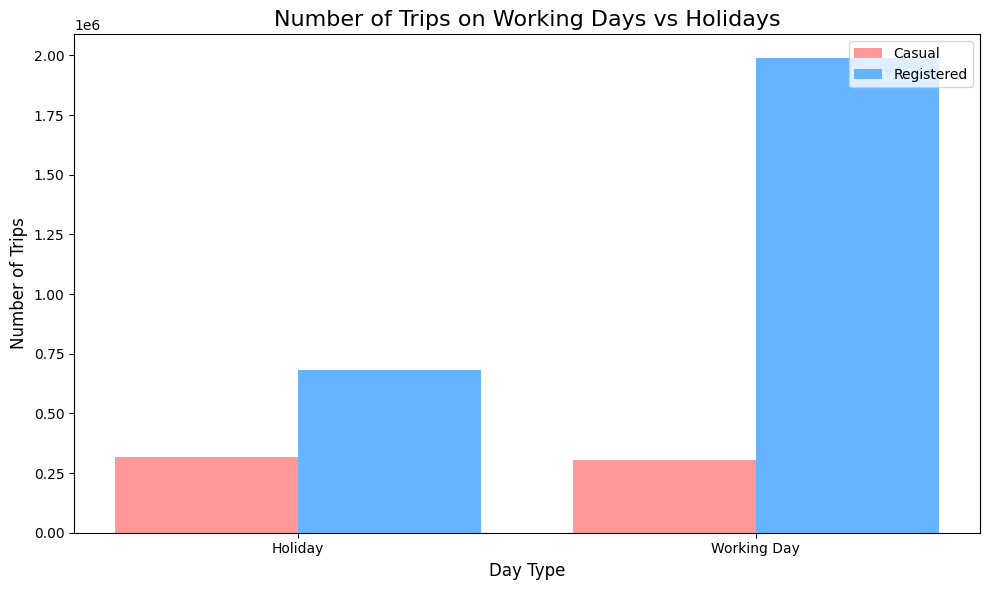

In [35]:
# Grouping data by working day (0: holiday, 1: working day) and summing up the 'casual' and 'registered' trips
grouped_working_day = bikes_day.groupby('working_day')[['casual', 'registered']].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_working_day.index - 0.2, grouped_working_day['casual'], width=0.4, label='Casual', color='#ff9999')
plt.bar(grouped_working_day.index + 0.2, grouped_working_day['registered'], width=0.4, label='Registered', color='#66b3ff')
plt.title('Number of Trips on Working Days vs Holidays', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks([0, 1], ['Holiday', 'Working Day'])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<b>Between working day and holiday, we can see here that there is an interesting pattern in the casual user type, which is almost the same for the number of trips compared to registered users, which is more dominant in number than during holidays.</b>

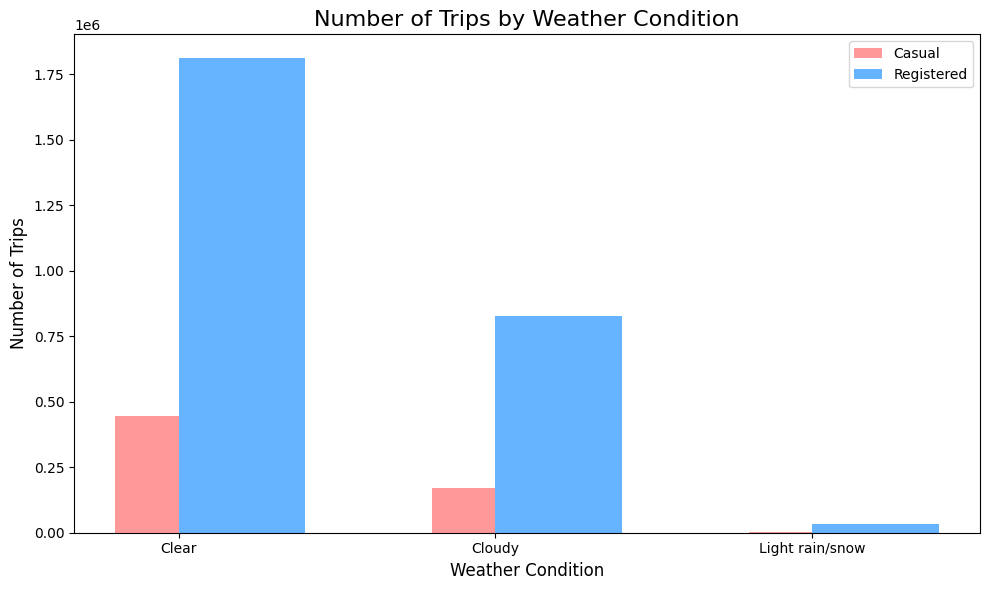

In [36]:
# Grouping data by weather and summing up the 'casual' and 'registered' trips
grouped_weather = bikes_day.groupby('weather')[['casual', 'registered']].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_weather.index, grouped_weather['casual'], width=0.4, label='Casual', color='#ff9999', align='center')
plt.bar(grouped_weather.index, grouped_weather['registered'], width=0.4, label='Registered', color='#66b3ff', align='edge')
plt.title('Number of Trips by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<b>As we can see above, the highest total registered borrowing is in clear weather followed by cloudy and finally in light rain/snow. But here it is interesting, there are no casual users who borrowed during light rain/snow weather.
This shows that registered users have a higher level of commitment in using the bike loan service even in light rain/snow weather conditions.</b>

## Conclusion

<b>Question 1:</b>
- Registered users showed a more consistent pattern of bicycle use throughout the week, with a slight decrease on weekends.
- On the other hand, regular users showed a significant increase in bike usage on weekends.
- Both types of users experienced a spike in bike rentals from January to July, followed by a drop in August.
- The hourly pattern shows that registered users have two peak borrowing times: 8am and 5pm. However, regular users have a more consistent increase throughout the day, with a peak at 5pm.
- During holidays, registered users dominate bike rentals compared to regular users.

<b>Question 2:</b>
- Clear weather is the most popular condition for bike rentals, followed by cloudy weather.
- Light rain/snow conditions are the least popular, with no regular users choosing to rent a bike in such weather.
- Registered users show a higher level of commitment to the bike rental service, even in challenging weather conditions.